In [1]:
import numpy as np

In [9]:
import matplotlib.pyplot as plt
import torch

In [10]:
#!pip install --user torch

In [46]:

# The class for plotting

class plot_diagram():
    #Constructor
    def __init__(self, X, Y, w, stop, go = False):
        start = w.data
        self.error = []
        self.parameter = []
        self.X = X.numpy()
        self.Y = Y.numpy()
        self.parameter_values = torch.arange(start,stop)
        self.Loss_function = [criterion(forward(X), Y) for w.data in self.parameter_values]
        w.data = start

    #executor
    def __call__(self, Yhat, w, error, n):
        self.error.append(error)
        self.parameter.append(w.data)
        plt.subplot(212)
        plt.plot(self.X, Yhat.detach().numpy())
        plt.plot(self.X, self.Y, 'ro')
        plt.xlabel('A')
        plt.ylim(-20,20)
        plt.subplot(211)
        plt.title('Data Space (top) Estimated Line (bottom) Iteration ' + str(n))
        plt.plot(self.parameter_values.numpy(),self.Loss_function)
        plt.plot(self.parameter, self.error, 'ro')
        plt.xlabel('B')
        plt.figure()
        
    #destructor
    def __del__(self):
        plt.close('all')

In [47]:
#create the f(x) with a slope of -3

X = torch.arange(-3,3,0.1).view(-1,1)

f = -3 * X

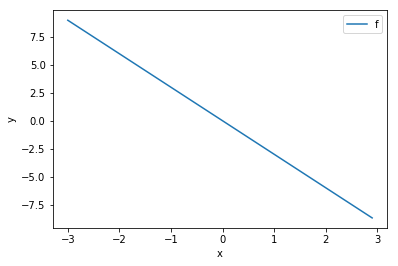

In [48]:
#plot the line in blue

plt.plot(X.numpy(), f.numpy(), label = 'f')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

In [49]:
# add some noice to f(X) and save it in Y

Y = f + 0.1 * torch.randn(X.size())

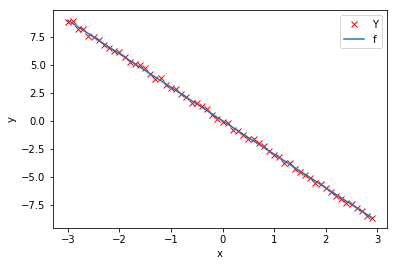

In [50]:
#plot the data points

plt.plot(X.numpy(), Y.numpy(), 'rx', label = 'Y')

plt.plot(X.numpy(), f.numpy(), label = 'f')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

In [51]:
# Create the mse function for evaluate the result

def criterion(yhat, y):
    return torch.mean((yhat - y)**2)

In [52]:
# Create forward function for prediction

def forward(x):
    return w * x

In [53]:
w = torch.tensor(-10.0, requires_grad = True)

In [54]:
# create a plot_diagram to visualize the data space and the aparemter space for each iteration during training:

gradient_plot = plot_diagram(X, Y, w, stop = 5)

In [55]:
# creat the learning rate and an empty list to record the loss for each iteration
lr = 0.1
LOSS = []

In [56]:
#define a fn for train the model

def train_model(iter):
    for epoch in range(iter):
        
        #make the predcition 
        Yhat = forward(X)
        
        #calculate the iteration
        loss = criterion(Yhat,Y)
        
        # plot the diagram for us to have a better idea
        gradient_plot(Yhat,w, loss.item(),epoch)
        
        #store the loss into the list
        LOSS.append(loss.item())
        
        #backaward pass: compute gradient of the loss with respect to all variables
        loss.backward()
        
        #update parameters
        w.data = w.data - lr *w.grad.data
        
        #zero the gradients before running backward pass
        w.grad.data.zero_()

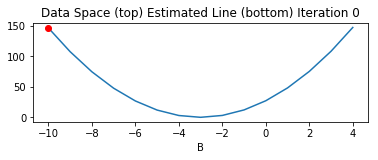

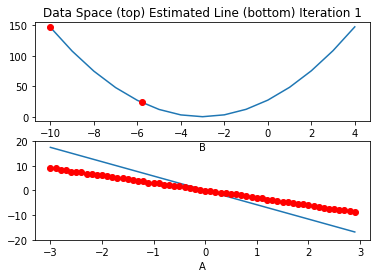

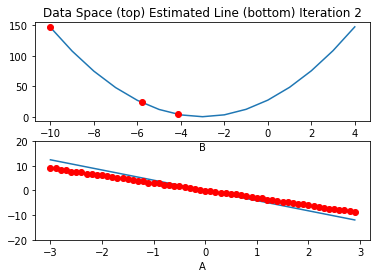

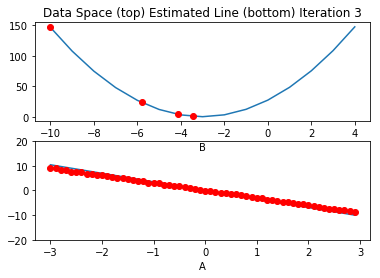

<Figure size 432x288 with 0 Axes>

In [57]:
#give 4 iterations  for training the model here

train_model(4)